# <b style="color:#f87730"> ⏩ Importando bibliotecas e o DataFrame. </b>

Como boa prática no nosso código, devemos começar importando o conjunto de ferramentas (bibliotecas)

que serão utilizadas ao longo do código. Enquanto trabalhamos no projeto, podemos sentir a necessidade

de "chamar" outras bibliotecas. Se for o caso, devemos voltar aqui e adicioná-las abaixo, afim de 

manter o código limpo e organizado, e para uma fácil identificação das ferramentas utilizadas. 

In [1]:
import numpy as np
import pandas as pd
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

Após isso, devemos ler o(s) conjunto(s) de dados que será utilizado, a partir da função **READ** do pandas.

###### O read conta com algumas variantes, a depender do tipo de arquivo lido. No nosso caso, utilizaremos o read_csv pois nossos arquivos estão no formato CSV.

In [2]:
# Ao rodar o código sem parâmetros (como o encoding), iremos nos deparar com um erro de decodificação de um caráctere.
# Procurando sobre ele no google, podemos encontrar sua causa (caso não fosse conhecida) e sua solução.
# Nesse caso, apenas trocar o encoding nos dará o resultado desejado, e conseguiremos ler o arquivo:

data = pd.read_csv('Data/forest_fires.csv', encoding='latin-1')

# 🌎 Visão geral e Tratamento dos dados

Nosso DataFrame (DF) tem poucas colunas, e por isso conseguimos visualizar todas na própria chamada do DF:

In [3]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


Caso não fosse o caso (se o DF tiver dezenas de colunas), poderíamos ver todas a partir da propriedade **COLUMNS**:

In [4]:
data.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [5]:
data.shape

(6454, 5)

_________

Outra propriedade, a **DTYPES**, nos permite ver os nomes das colunas e os tipos de dados que elas armazenam.

É de extrema importância saber qual o tipo em que estão armazenados os nossos dados, para pensarmos

na melhor solução possível para os problemas que envolverão essas entradas.

In [6]:
data.dtypes

year        int64
state      object
month      object
number    float64
date       object
dtype: object

Um exemplo claro disso é a coluna **DATE**, que representa o mês e ano daqueles dados.

Essa coluna conta também com o dia, mas como estamos falando das médias mensais,

ele acaba sendo sempre padronizado para 01. Como se trata de uma data, formataremos

esta coluna para o tipo **DateTime**:

In [7]:
data.date = pd.to_datetime(data.date)

De forma similar, percebemos que a coluna "number" está no formato **FLOAT**, porém devemos lembrar que

o formato de FLOAT serve para números decimais. Porém, devemos concordar que não existe "um fogo e meio".

Ou o incêndio existe ou não. Logo, vamos passar para **INT** essa coluna, que são os números inteiros.

In [8]:
data.number = data.number.astype('int64')

Ao chamar novamente o DTYPES, podemos observar que os seu tipos foram alterados:

In [9]:
data.dtypes

year               int64
state             object
month             object
number             int64
date      datetime64[ns]
dtype: object

____

Agora, verificaremos se existem **dados duplicados**.

Na linha de código abaixo, selecionamos dentro do conjunto de dados aqueles dados que são duplicados,

e com o parâmetro Keep setado p/ False, podemos ter uma visão de todas entradas repetidas.

In [10]:
data[data.duplicated(keep=False)]

,year,state,month,number,date
258,2017,Alagoas,Janeiro,38,2017-01-01
259,2017,Alagoas,Janeiro,38,2017-01-01
2391,1998,Mato Grosso,Janeiro,0,1998-01-01
2411,1998,Mato Grosso,Fevereiro,0,1998-01-01
2431,1998,Mato Grosso,Março,0,1998-01-01
...,...,...,...,...,...
4841,1998,Rio,Abril,0,1998-01-01
4861,1998,Rio,Maio,0,1998-01-01
4864,2001,Rio,Maio,4,2001-01-01
4910,2007,Rio,Julho,7,2007-01-01


Atenção: O Keep = False servirá apenas para a visualização dos dados,

pois se o mantermos durante a remoção dos dados, acabaremos com um total

de 0 dessas entradas (ele não MANTERÁ nenhuma). Segue abaixo:

In [11]:
data = data.drop_duplicates()

In [12]:
# Verificando novamente, vemos que não existem mais valores duplicados:

data[data.duplicated(keep=False)]

,year,state,month,number,date


________

Outro ponto importante que devemos SEMPRE estar atentos são valores nulos e faltantes. Podemos determinar a sua quantidade da seguinte maneira:

Usamos o método .isnull(), que determinará uma variável booleana ao registro (False se o registro estiver preenchido, True caso esteja faltando)

Após isso, usamos outro método, o .sum() para realizar a contagem geral do total de registros faltantes. Caso exista algum registro faltante devemos observar

um número diferente de 0, e tomar as devidas providências para que nossas análises não sejam contaminadas ou atrapalhadas por ele.

In [13]:
# No conjunto de dados trabalhado, observamos que todos os valores existem e não há registros nulos, logo não será necessário nenhuma alteração aqui:

data.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

______

# 🔍 Visualizando os dados limpos

Em seguida, podemos usar o método **DESCRIBE** para observar algumas das características das colunas numéricas do DF

In [14]:
data.describe()

,year,number
count,6421.000000,6421.000000
mean,2007.490734,108.773867
std,5.732222,191.184606
min,1998.000000,0.000000
25%,2003.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,114.000000
max,2017.000000,998.000000


A partir do describe, podemos ter uma visão das características gerais do DF:

1. Count - **Contagem de registros** (linhas) na coluna;

2. Mean - **Média da coluna**;

3. Std - **Desvio padrão da coluna** (podemos observar por exemplo que no **YEAR** o STD é baixo,

    pois os dados se concentram num período de apenas 19 anos de diferença, enquanto no NUMBER
    
    temos um STD muito mais alto, pois os dados variam entre 0 e 998 na coluna;

4. Min - **Valor mínimo** encontrado na coluna, menor registro;

5. 25% - **Primeiro Quartil** ou **Q1** (25% dos valores se encontram abaixo daqui);

6. 50% - **Segundo Quartil** ou **Q2** (50% dos valores estão abaixo daqui);

7. 75% - **Terceiro Quartil** ou **Q3** (75% dos valores estão abaixo daqui);

8. Max - **Valor máximo** encontrado na coluna, maior registro.

In [15]:
# Além dos quartis padrão vistos acima, podemos obter os dados que se encontram antes de uma porcentagem X%,
# utilizando o método QUANTILE, e dentro dele passando a porcentagem que desejamos como argumento: nesse caso, 60%

data.quantile(0.60)

year      2009.0
number      46.0
Name: 0.6, dtype: float64

Também podemos gerar gráficos que nos ajudam na visualização da distribuição dos dados, como o **BOXPLOT**.

Nesse caso, podemos ver os três quartis citados acima na **BARRA** do gráfico, sendo sua parte inferior o Q1,

a linha verde o Q2 e sua parte superior o Q3. Além disso, percebemos também uma linha que segue até um valor

que se aproxima de 275. Esses dados são considerados "normais" dentro da distribuição. Os pontos pretos são os **OUTLIERS**,

dados que não estão dentro da distribuição esperada da maioria dos dados. Porém, isso não quer dizer que devemos sempre

eliminar estes dados, ou que eles são um problema. Nesse caso, eles não afetarão nossas análises estatísticas nem os gráficos,

e por se tratarem de uma representação da realidade, serão mantidos no nosso conjunto de dados.

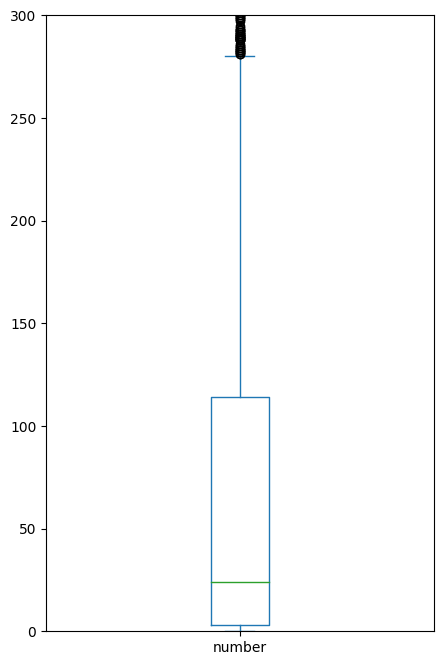

In [16]:
# Nestes dados os outliers (bolinhas pretas) vão até próximas do valor de 1000 se não limitarmos o tamanho do gráfico.
# Porém, para melhor visualização dos quartis em si, optei por limitar o range entre 0 e 300, onde começam a aparecer
# Os primeiros outliers. Os valores continuam existindo, apenas não estão destacados no gráfico.


data.number.plot(kind='box', figsize=(5,8))

plt.ylim(0,300)
plt.show()

Outro método para verificarmos essa distribuição é o **DISTPLOT**, da biblioteca **SEABORN**:

Notamos que ela não é uma Distribuição Padrão (Gaussiana/Bell Shaped), e sim uma distribuição

<b style="color:#1c87d9">**RIGHT SKEWED**</b>, ou seja, seus dados seguem o padrão de estarem altamente concentrados na parte DIREITA.

Isso se confirma quando observamos os valores da Moda, que vem primeiro (0), seguido da mediana (24) e em seguida, a Média (108)

Moda: 0;
Mediana: 24.0;
Média: 108.77386699890982


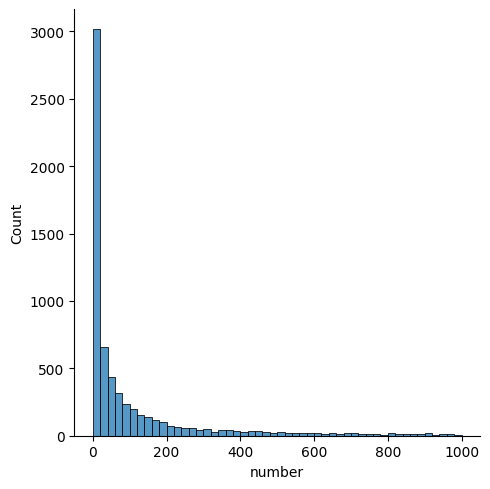

In [17]:
sns.displot(data, x='number', binwidth=20)

plt.plot()
print(f'Moda: {data.number.mode()[0]};\nMediana: {data.number.median()};\nMédia: {data.number.mean()}')


____

> ❗ ATENÇÃO: Para o tipo ser realmente alterado, temos de atribuir a operação (to_datetime) ao objeto a ser alterado,
>
>   neste caso, a própria coluna de data. Pode ser feito com a atribuição acima, ou usando o parâmetro **INPLACE**, que apesar de funcionar,
>
>   é atualmente uma prática desencorajada pela própria documentação do Pandas.